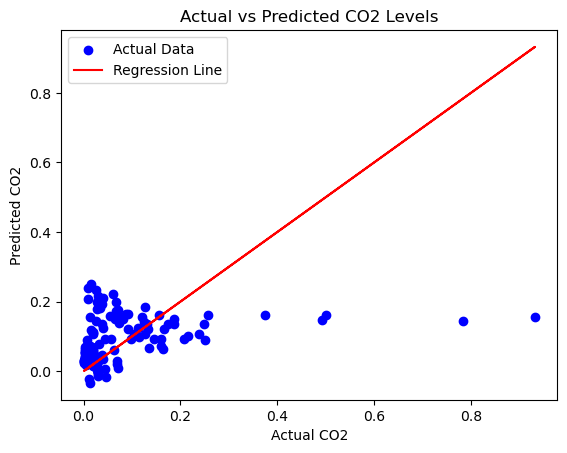

Mean Absolute Error (MAE): 0.04770054167270584
Mean Squared Error (MSE): 0.008637318072165804
R-squared (R2) Score: 0.12958760464948416


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Imports the csv file 
df = pd.read_csv('co2_data_ver1.csv')

# Removes all the unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Testing the print to see the data points. Can uncomment for smoother looks
#df

# Removes all the rows with missing values
df.dropna(inplace=True)

# Set up the predictors aka X
x = df[['Pressure (bar)', 'Temperature (°C)', 'mNaCl (mol/Kg)']]
y = df['XCO2']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

# Fit the linear regression model using the training data
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)

# Predict CO2 levels using the testing data
predictedCO2 = regression.predict(x_test)

# Plotting the actual data
plt.scatter(y_test, predictedCO2, color='blue', label='Actual Data')

# Plotting the regression line
plt.plot(y_test, y_test, color='red', label='Regression Line')

plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.title('Actual vs Predicted CO2 Levels')
plt.legend()
plt.show()

# Mean Absolute Error, Mean Squared Error, R2 Calculations

# Calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictedCO2)

# Calculating MSE 
mse = mean_squared_error(y_test, predictedCO2)

# Calculating R2 Score
r2 = r2_score(y_test, predictedCO2)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

## ML Algorithms to do: 
- Decision Trees
- Random Forest
- Extra Trees
- Extreme Gradient Boosting (XZ) boost
- SVM (Hyperparameter tuning)
- MLP 


## Decision Tree Regression


In [2]:
pip install graphviz pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score  # Regression evaluation metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Load the dataset
data = pd.read_csv('co2_data_ver1.csv')

# Remove unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Handle missing values (consider appropriate imputation techniques)
data.dropna(inplace=True)

# Define features and target variable
feature_cols = ['Pressure (bar)', 'Temperature (°C)', 'mNaCl (mol/Kg)']
X = data[feature_cols]
y = data.XCO2

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree Regressor object
model = DecisionTreeRegressor()

# Train the Decision Tree Regressor
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance (Regression)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

dot_data=StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Testing.png')
Image(graph.create_png())


Mean Squared Error: 0.002715851545368815
R-squared: 0.8072368523042441
